<a href="https://colab.research.google.com/github/greyson-newton/youtube_ai/blob/master/job_openings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
!ls
import os
os.chdir("drive/My Drive/projects-deep_learning/jobOpenings_EDA")

data  figs  job_openings.ipynb


FileNotFoundError: ignored

# Imports


In [ ]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stop_words = en.Defaults.stop_words


In [ ]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tqdm import tqdm, tqdm_notebook

from glob import glob

import re
import gc

import json

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import plotly.express as px #Plotly Express

from plotly.offline import iplot
#to link plotly to pandas
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.style.use('seaborn-whitegrid')
sns.set_palette('Set3')

import os
print(os.listdir('./data/'))

import warnings
warnings.simplefilter('ignore')

from time import time, strftime, gmtime
start = time()
import datetime
print(str(datetime.datetime.now()))



['data.csv']
2021-11-27 21:27:15.184106


# Importing Data

Pandas DataFrame was used, I got the dataset from Kaggle and the dataset is described below:

In [ ]:
#  Importing Data
df = pd.read_csv('./data/data.csv')

In [ ]:
#  Looking at data description
df.head(10)

,uniq_id,crawl_timestamp,url,job_title,company_name,city,state,country,post_date,job_description,job_type,inferred_salary_time_unit,job_board,geo,job_post_lang,valid_through,html_job_description,inferred_iso2_lang_code,inferred_iso3_lang_code,site_name,domain,postdate_yyyymmdd,has_expired,last_expiry_check_date,latest_expiry_check_date,postdate_in_indexname_format,inferred_city,inferred_state,inferred_country,fitness_score
0,9a457ef257fecf231693a6ba08f50293,2020-06-26 01:54:03 +0000,https://www.careerbuilder.com/job/J3W0PF650Z8Q...,Asphalt/Concrete Senior Project Manager,GPAC,Houston,TX,US,2020-06-25,SR. PROJECT MANAGER WANTED!!! My client is a M...,Full-Time,/,careerbuilder,usa,en-us,2020-07-24,<strong>Job Description</strong> SR. PROJECT M...,en,eng,careerbuilder_usa_com_job_board_common_setup_p...,careerbuilder_com,20200625,False,2020.06.26,2020-06-26,2020.06.22,Houston,Texas,United states,10
1,ba471e2faf6f79caf22cddebbedbc0e8,2020-05-17 01:21:05 +0000,https://www.careerbuilder.com/job/J3P0FL6X795R...,Amazon Warehouse Team - Full Time,Amazon Fulfillment,Cincinnati,OH,US,2020-05-16,"Shifts: Overnight, Early Morning, Day, Evening...",Full-Time,/,careerbuilder,usa,en-us,2020-06-15,<strong>Job Description</strong> <div> <b>Shif...,en,eng,careerbuilder_usa_com_job_board_common_setup_p...,careerbuilder_com,20200516,False,2020.05.17,2020-05-17,2020.05.11,Cincinnati,Ohio,United states,10
2,6f00bd02d63c633b5af453366f25c21e,2020-06-27 04:53:42 +0000,https://www.careerbuilder.com/job/J3W3XK69NHHR...,Amazon Warehouse Associate - Morning Shifts Av...,Amazon Fulfillment,Peabody,MA,US,2020-06-26,"Shifts: Early Morning, Day, Evening Location: ...",Full-Time,/,careerbuilder,usa,en-us,2020-07-25,<strong>Job Description</strong> <div> <b>Shif...,en,eng,careerbuilder_usa_com_job_board_common_setup_p...,careerbuilder_com,20200626,False,2020.06.27,2020-06-27,2020.06.22,Peabody,Massachusetts,United states,10
3,8ad0d00bfa23cfd7b7c364b8ae72085f,2020-06-03 01:21:32 +0000,https://www.careerbuilder.com/job/J3Q5RL6VS7PG...,Assembly Electrical,Manpower,Villard,MN,US,2020-06-02,Do you pride yourself on attention to detail a...,Full-Time,/hour,careerbuilder,usa,en-us,2020-07-01,<strong>Job Description</strong> <p>Do you pri...,en,eng,careerbuilder_usa_com_job_board_common_setup_p...,careerbuilder_com,20200602,False,2020.06.03,2020-06-03,2020.06.01,Villard,Minnesota,United states,10
4,31753dc342a1b2a07db712454c0d5f87,2020-05-23 01:19:07 +0000,https://www.careerbuilder.com/job/J3V1TJ68DPJ7...,Graphics Designer,The North West Company - U.S.,Anchorage,AK,US,2020-05-22,In your role as Graphics Designer for Alaska C...,Full-Time,/,careerbuilder,usa,en-us,2020-06-21,<strong>Job Description</strong> In your role ...,en,eng,careerbuilder_usa_com_job_board_common_setup_p...,careerbuilder_com,20200522,False,2020.05.23,2020-05-23,2020.05.22,Anchorage,Alaska,United states,10
5,d8bbd27764ff850f5cd05dfa3289ff66,2020-05-25 10:04:56 +0000,https://www.careerbuilder.com/job/J3P38262RVJT...,"Customer Service Representative, Full or Part ...",Circle K,Urbana,IL,US,2020-05-24,may change periodically as required by busines...,Full-Time,/,careerbuilder,usa,en-us,2020-06-23,<strong>Job Description</strong> <br /><br /><...,en,eng,careerbuilder_usa_com_job_board_common_setup_p...,careerbuilder_com,20200524,False,2020.05.25,2020-05-25,2020.05.22,Urbana,Illinois,United states,10
6,b716cdee3b40360f88be08b4cc75d598,2020-05-23 01:13:40 +0000,https://www.careerbuilder.com/job/J3M89H6Z9X5J...,Receptionist,Genesis Healthcare Corporation,South Brunswick Township,NJ,US,2020-05-22,Genesis HealthCare is one of the nation's lead...,Per Diem,/,careerbuilder,usa,en-us,2020-06-21,<strong>Job Description</strong> <br /><br /> ...,en,eng,careerbuilder_usa_com_job_board_common_setup_p...,careerbuilder_com,20200522,False,2020.05.23,2020-05-23,2020.05.22,NaN,New jersey,United states,10
7,94e46cabddc4e30277870061fc6a06ea,2020-06-25 01:48:48 +0000,https://www.careerbuilder.com/job/J3S5PB752JPZ...,U-Haul

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29982 entries, 0 to 29981
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   uniq_id                       29982 non-null  object
 1   crawl_timestamp               29982 non-null  object
 2   url                           29982 non-null  object
 3   job_title                     29982 non-null  object
 4   company_name                  29982 non-null  object
 5   city                          29982 non-null  object
 6   state                         29982 non-null  object
 7   country                       29973 non-null  object
 8   post_date                     29982 non-null  object
 9   job_description               29982 non-null  object
 10  job_type                      29750 non-null  object
 11  inferred_salary_time_unit     29982 non-null  object
 12  job_board                     29982 non-null  object
 13  geo             

# Cleaning Data

Methodology, I used a pandas DataFrame to store the data, which has a isna() method that detects all values that are unfilled. Using this method I removed columns that had more than 80% missing values. There were 10 features that were dropped

In [ ]:
missing = df.isna().sum().reset_index()
missing.columns = ['features', 'total_missing']
missing['percent'] = (missing['total_missing'] / len(df)) * 100
missing.index = missing['features']
del missing['features']

missing['total_missing'].iplot(kind = 'bar', 
                               title = 'Missing Values Count in Dataset',
                               xTitle = 'Features',
                               colors = 'red',
                               yTitle = 'Count')
missing.T
to_drop = missing[missing['percent'] >= 80.0].index
print(f"There are {len(to_drop)} features with more than 80% missing values. We will drop this from dataset.")
df.drop(to_drop, axis = 1, inplace = True)
df.shape

There are 0 features with more than 80% missing values. We will drop this from dataset.


(29982, 30)

# Analyzing Data

I analyzed multiple aspects of the CareerBuilder job listing dataset. We will look at the most job openings by 'job-type', 'openings per state', 'companies w/ most openings'. 

From analysis we can see that Amazon by far has the most job openings, with openings in over 2000 locations. Recently Amazon just increased their minimum wage to $15 dollars in hour, using this data and this analysis we can see some of the motivation behind Amazon's choice in increasing pay. 


In [ ]:

jobs=df
import itertools
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud

def plot_wordcloud(data, col, text = None):
    all_words = [word for word in data[col] if word not in stop_words]
    word_freq = Counter(all_words)

    wordcloud = WordCloud(width = 900,
                          height = 500,
                          max_words = 200,
                          max_font_size = 100,
                          relative_scaling = 0.5,
                          background_color = "rgba(255, 255, 255, 0)", 
                          mode = "RGBA",
                          normalize_plurals = True).generate_from_frequencies(word_freq)
    plt.figure(figsize = (18, 16))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(text, fontsize = 20, color = 'Red', y = 1.05)
    plt.axis("off")
    plt.show()

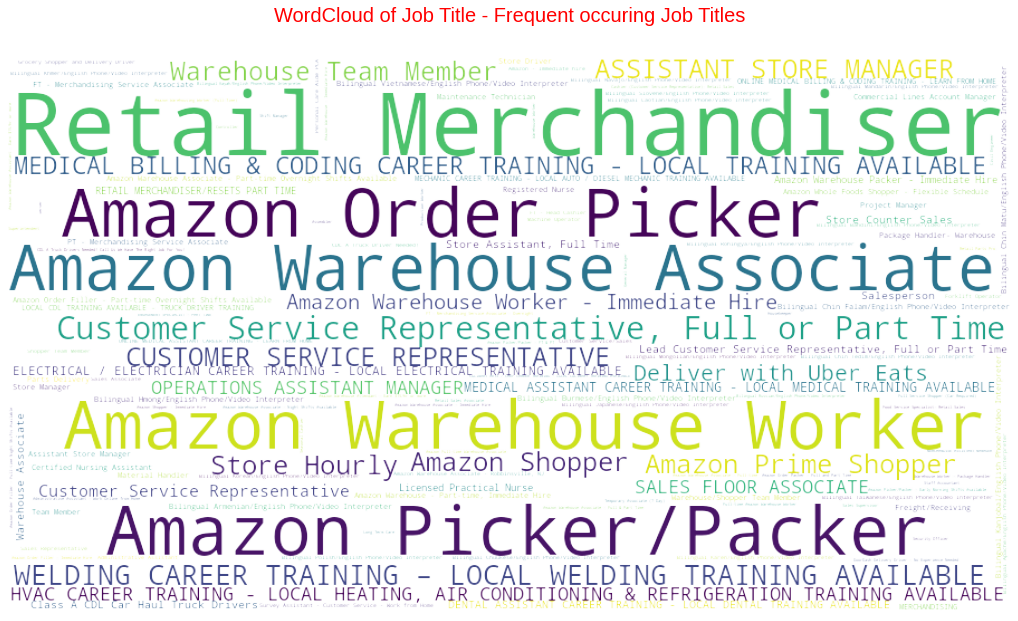

In [ ]:
plot_wordcloud(jobs, 'job_title', 'WordCloud of Job Title - Frequent occuring Job Titles')

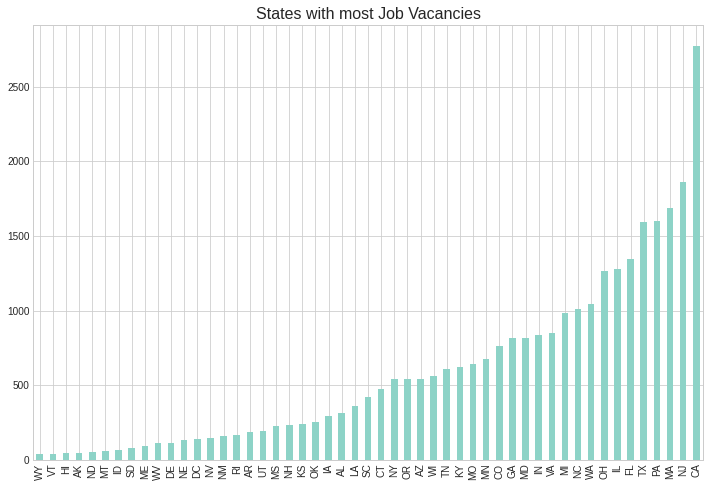

In [ ]:
openings_by_state=jobs['state'].value_counts().sort_values(ascending = True).plot(kind = 'bar', 
                                                                  orientation = 'vertical',
                                                                  title = 'States with most Job Vacancies'
                                                                 )


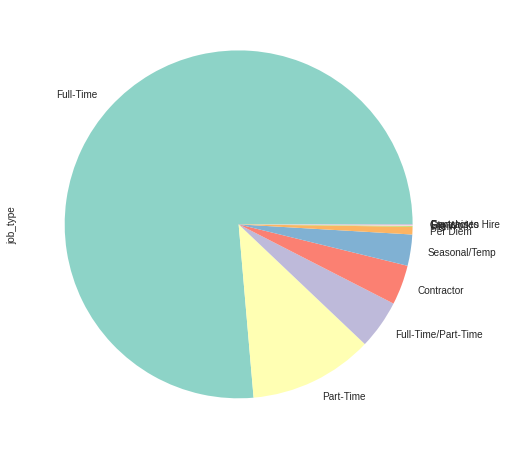

In [ ]:
jobs['job_type'].value_counts().plot.pie()

In [ ]:
jobtypes = jobs['job_type'].value_counts()
px.pie(jobtypes, values = jobtypes.values, names = jobtypes.index,
       title = 'No. of Job Postings by Job_Type',
      color_discrete_sequence = px.colors.qualitative.Pastel)

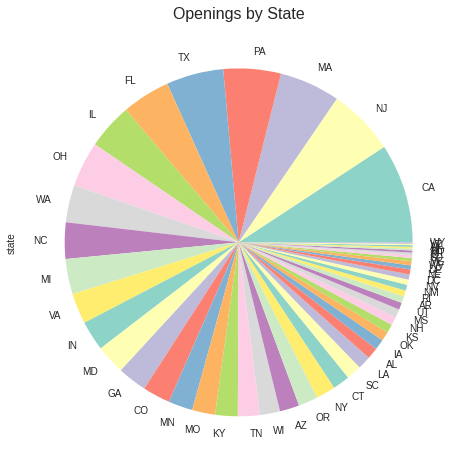

In [ ]:
jobs['state'].value_counts().plot.pie(title='Openings by State')

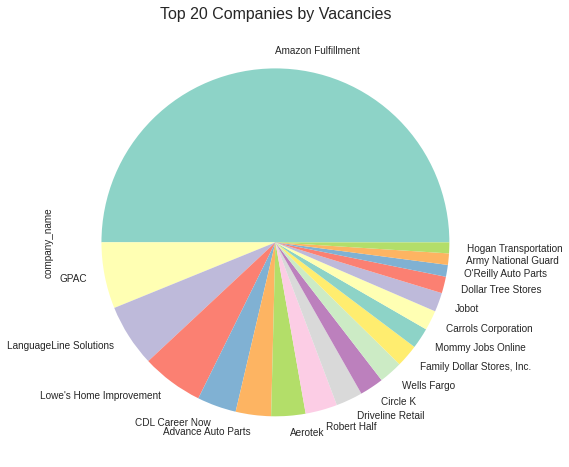

In [ ]:
jobs['company_name'].value_counts().sort_values(ascending = False)[:19].plot(kind = 'pie', 
                                                                  title = 'Top 20 Companies by Vacancies'
                                                                 )

In [ ]:
amazon = jobs[jobs['company_name'] == 'Amazon Fulfillment'][['state', 'city']].value_counts()
print(f"Amazon Fulfillment has job vacancies in {len(amazon)} locations")

Amazon Fulfillment has job vacancies in 2286 locations


In [ ]:
print(f"Number of locations with one Amazon Fulfillment job vacancies is {len(amazon[amazon.values == 1])}")

Number of locations with one Amazon Fulfillment job vacancies is 1003
